Generate 10-year average precipitation bias map

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import xarray as xr

from matplotlib import pyplot as plt

from fme_diags.bias import compute_time_mean_bias, plot_time_mean_bias
from fme_diags.utils import get_run_kwargs, load_config, open_autoregressive_inference, open_reference

_ = xr.set_options(keep_attrs=True)

In [2]:
if not "RUN_KEY" in os.environ:
    RUN_KEY = "42yrs-batch_size8-max_epochs50-lr3e-4-run4"
    REF_KEY = "42-years-training-set-reference"
else:
    RUN_KEY = os.environ["RUN_KEY"]
    REF_KEY = os.environ["REFERENCE_KEY"]

In [3]:
config = load_config("./preds.yaml")
run_kwargs = get_run_kwargs(config, RUN_KEY)
run_kwargs

{'path': '/pscratch/sd/j/jpduncan/ai2/datasets/2023-11-22-e3smv2-vertically-resolved-1deg-fme-dataset/output/42-years-training-set/42yrs-batch_size8-max_epochs50-lr3e-4-run4/autoregressive_predictions.nc',
 'start': '0054-01-01',
 'step_dim': 'lead',
 'step_freq': '6H',
 'calendar': 'noleap',
 'flip_lat': False,
 'chunks': {'lead': 178}}

In [4]:
FIG_PREFIX = "precip-biases"
OUTDIR = f"figs/{RUN_KEY}"
os.makedirs(OUTDIR, exist_ok=True)

In [5]:
ds = open_autoregressive_inference(**run_kwargs)
ds

<xarray.Dataset>
Dimensions:                                        (time: 14597, sample: 1,
                                                    source: 2, lat: 180,
                                                    lon: 360)
Coordinates:
  * time                                           (time) object 0054-01-01 0...
    init                                           (sample) object dask.array<chunksize=(1,), meta=np.ndarray>
    valid_time                                     (sample, time) object dask.array<chunksize=(1, 178), meta=np.ndarray>
  * source                                         (source) object 'target' '...
  * lat                                            (lat) float32 89.24 ... -8...
  * lon                                            (lon) float32 0.5 ... 359.5
Dimensions without coordinates: sample
Data variables: (12/49)
    surface_upward_shortwave_flux                  (source, sample, time, lat, lon) float32 dask.array<chunksize=(2, 1, 178, 180, 360), meta=np.ndarray>
    specific_total_water_7                         (source, sample, time, lat, lon) float32 dask.array<chunksize=(2, 1, 178, 180, 360), meta=np.ndarray>
    PHIS                                           (source, sample, time, lat, lon) float32 dask.array<chunksize=(2, 1, 178, 180, 360), meta=np.ndarray>
    T_3                                            (source, sample, time, lat, lon) float32 dask.array<chunksize=(2, 1, 178, 180, 360), meta=np.ndarray>
    T_6                                            (source, sample, time, lat, lon) float32 dask.array<chunksize=(2, 1, 178, 180, 360), meta=np.ndarray>
    U_3                                            (source, sample, time, lat, lon) float32 dask.array<chunksize=(2, 1, 178, 180, 360), meta=np.ndarray>
    ...                                             ...
    V_2                                            (source, sample, time, lat, lon) float32 dask.array<chunksize=(2, 1, 178, 180, 360), meta=np.ndarray>
    V_6                                            (source, sample, time, lat, lon) float32 dask.array<chunksize=(2, 1, 178, 180, 360), meta=np.ndarray>
    LHFLX                                          (source, sample, time, lat, lon) float32 dask.array<chunksize=(2, 1, 178, 180, 360), meta=np.ndarray>
    TS                                             (source, sample, time, lat, lon) float32 dask.array<chunksize=(2, 1, 178, 180, 360), meta=np.ndarray>
    FSDS                                           (source, sample, time, lat, lon) float32 dask.array<chunksize=(2, 1, 178, 180, 360), meta=np.ndarray>
    specific_total_water_4                         (source, sample, time, lat, lon) float32 dask.array<chunksize=(2, 1, 178, 180, 360), meta=np.ndarray>

In [6]:
ref_ds = open_reference(
    path = config["runs"][REF_KEY]["url"],
    start = run_kwargs["start"],
    lat_coords=ds["lat"],
    step_freq=run_kwargs["step_freq"],
    calendar=run_kwargs["calendar"],
)
ref_ds

,Array,Chunk
Bytes,3.52 GiB,1.19 MiB
Shape,"(14600, 180, 360)","(124, 7, 360)"
Count,3480 Tasks,3120 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,3.52 GiB,1.19 MiB
Shape,"(14600, 180, 360)","(124, 7, 360)"
Count,3480 Tasks,3120 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


Plot SFNO biases.

In [7]:
da = ds["surface_precipitation_rate"]

time_mean_bias = compute_time_mean_bias(
    da.sel(source="prediction"),
    da.sel(source="target")
)

[########################################] | 100% Completed |  5.9s


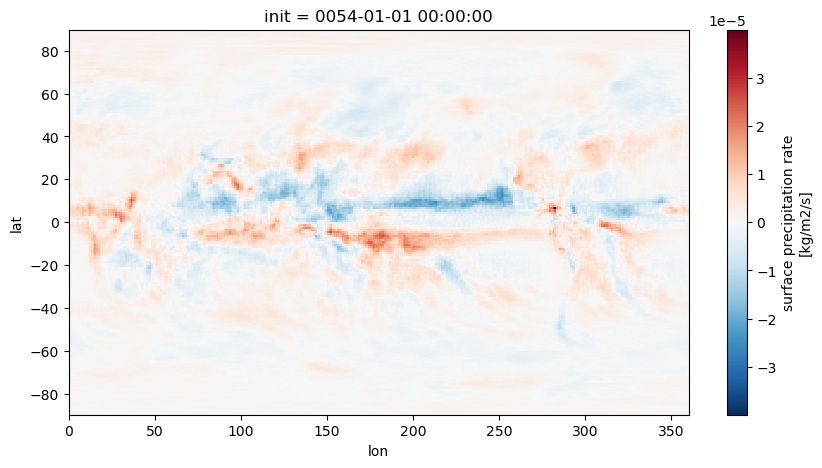

In [8]:
time_mean_bias.plot(figsize=(10, 5))
plt.show()

In [9]:
plt.savefig(os.path.join(OUTDIR, f"{FIG_PREFIX}_fig1.png"), bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

Plot bias of last 10 years of training set.

In [10]:
ref_da = ref_ds["surface_precipitation_rate"]

ref_time_mean_bias = compute_time_mean_bias(
    ref_da,
    da.sel(source="target")
)

[########################################] | 100% Completed | 55.4s


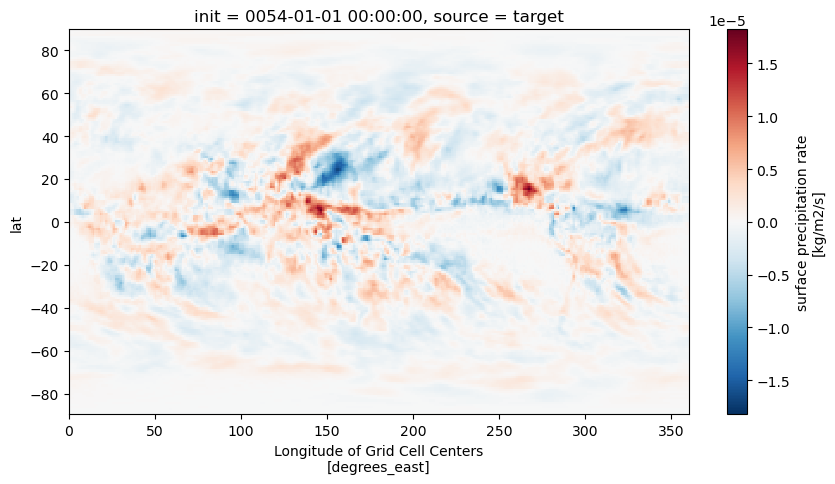

In [11]:
ref_time_mean_bias.plot(figsize=(10, 5))
plt.show()

In [12]:
plt.savefig(os.path.join(OUTDIR, f"{FIG_PREFIX}_fig2.png"), bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

Plot the SFNO and reference biases together.

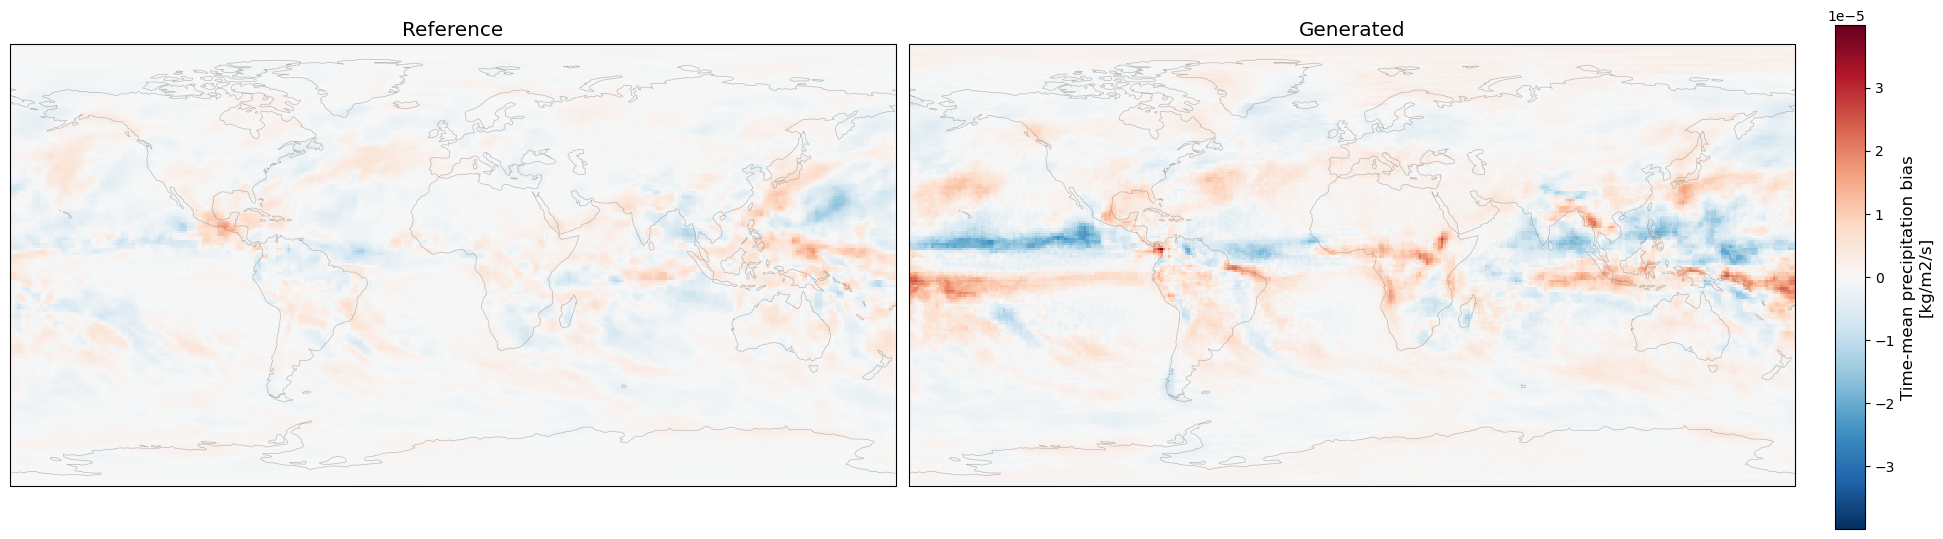

In [13]:
fig, axs = plot_time_mean_bias(
    time_mean_bias, 
    ref_time_mean_bias,
    var_name="precipitation"
)

In [14]:
fig.savefig(os.path.join(OUTDIR, f"{FIG_PREFIX}_fig3.png"), bbox_inches="tight")